### Exercise 1

Try clustering the iris data.  Try different numbers of clusters. Print the confusion matrix that compares the cluster labels with the actual labels.  What seems to give the best clustering according to ground truth?  How do you know?

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np

# Load the iris dataset
data = load_iris()
X = data.data
y_true = data.target

# Define a list to store confusion matrices for different numbers of clusters
confusion_matrices = []

# Try different numbers of clusters
for k in range(2, 6):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    confusion_matrices.append(cm)
    
    # Print confusion matrix for the current number of clusters
    print(f"Confusion Matrix for {k} clusters:")
    print(cm)
    print()


Confusion Matrix for 2 clusters:
[[ 0 50  0]
 [47  3  0]
 [50  0  0]]

Confusion Matrix for 3 clusters:
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]

Confusion Matrix for 4 clusters:
[[ 0 50  0  0]
 [23  0 27  0]
 [26  0  1 23]
 [ 0  0  0  0]]

Confusion Matrix for 5 clusters:
[[ 0 50  0  0  0]
 [23  0 27  0  0]
 [13  0  1 12 24]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]



### Exercise 2

Use the elbow method, the silhouette method, and the Davies-Bouldin method to evaluate your clustering result.  Do the data-driven methods provide clear guidance?

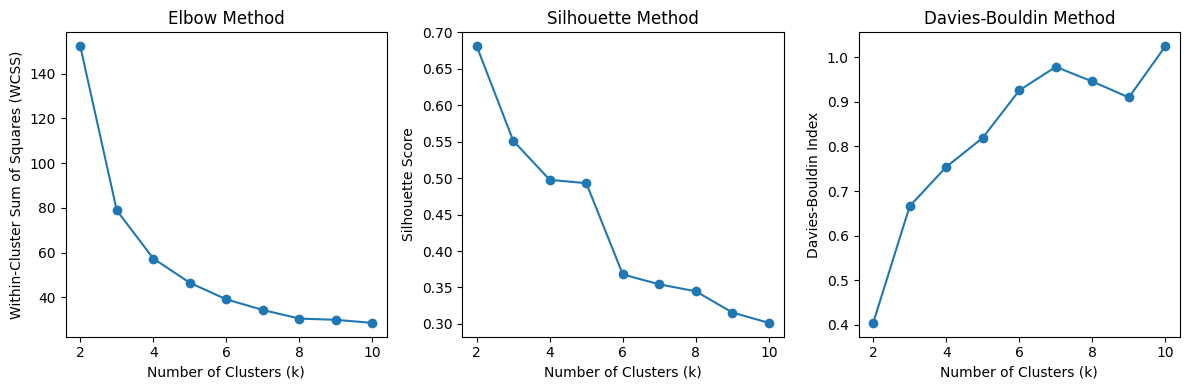

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Define a function to calculate clustering evaluation metrics
def evaluate_clustering(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    wcss = kmeans.inertia_
    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    return wcss, silhouette, db_index

# Perform clustering evaluation for different numbers of clusters
k_values = range(2, 11)
wcss_values = []
silhouette_values = []
db_values = []

for k in k_values:
    wcss, silhouette, db_index = evaluate_clustering(X, k)
    wcss_values.append(wcss)
    silhouette_values.append(silhouette)
    db_values.append(db_index)

# Plot the results
plt.figure(figsize=(12, 4))

# Elbow Method
plt.subplot(1, 3, 1)
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')

# Silhouette Method
plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

# Davies-Bouldin Method
plt.subplot(1, 3, 3)
plt.plot(k_values, db_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Method')

plt.tight_layout()
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, n_init=2, init='random')



### Exercise 3

In the following example, MeanShift, SpectralClustering, DBScan and HDBScan to fit the data. For each clustering method, can you find parameter setting that result in approximately the same clustering?  How would you do this without visual inspection?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import hdbscan
from sklearn.cluster import DBSCAN

# Create synthetic data: two moons + noise + a dense small cluster
moons_data, _ = make_moons(n_samples=150, noise=0.05)
noise = np.random.rand(50, 2) * 2.5 - 1.25
dense_cluster = np.random.rand(50, 2) * 0.2 + [1, -0.25]
data = np.vstack([moons_data, noise, dense_cluster])

# DBScan clustering
dbscan_labels = DBSCAN(eps=0.11, min_samples=5).fit_predict(data)

# HDBScan clustering
hdbscan_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10).fit_predict(data)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='rainbow', s=50)
ax1.set_title('DBScan Clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(data[:, 0], data[:, 1], c=hdbscan_labels, cmap='rainbow', s=50)
ax2.set_title('HDBScan Clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'hdbscan'

### Exercise 4

The following plot contains five clusters.  See if you can set the parameters of GMM to identify all clusters.

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


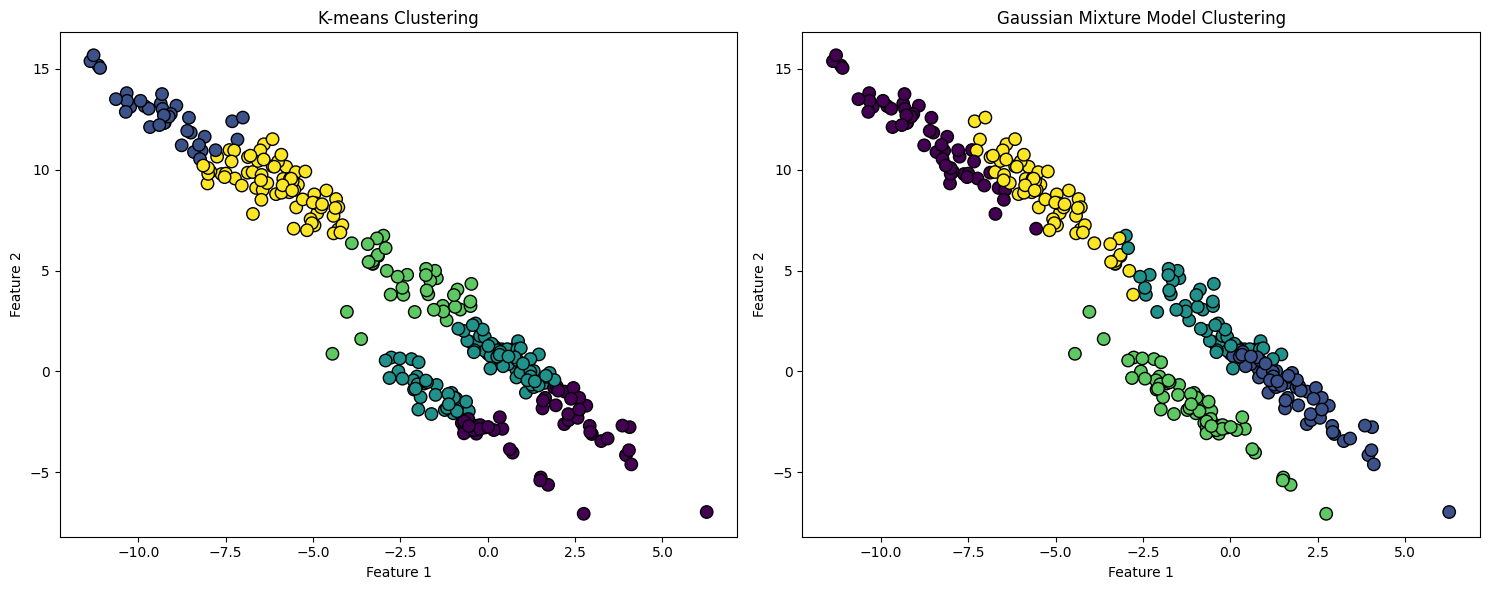

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Generate synthetic data with spherical clusters
X, y = make_blobs(n_samples=300, centers=5, cluster_std=2.0,random_state=42)

# Stretch and rotate some of the blobs to create elliptical clusters
transformation_matrix = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = np.dot(X, transformation_matrix)

# Apply k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Apply GMM
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(X_aniso)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
